## Problem Statement:

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

## Data Storage:

This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables:
 Country code
 Country name
The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the
following variables:

• Restaurant Id: Unique id of every restaurant across various cities of the world
• Restaurant Name: Name of the restaurant
• Country Code: Country in which restaurant is located
• City: City in which restaurant is located
• Address: Address of the restaurant
• Locality: Location in the city
• Locality Verbose: Detailed description of the locality
• Longitude: Longitude coordinate of the restaurant&#39;s location
• Latitude: Latitude coordinate of the restaurant&#39;s location
• Cuisines: Cuisines offered by the restaurant
• Average Cost for two: Cost for two people in different currencies ��
• Currency: Currency of the country
• Has Table booking: yes/no
• Has Online delivery: yes/ no
• Is delivering: yes/ no
• Switch to order menu: yes/no
• Price range: range of price of food
• Aggregate Rating: Average rating out of 5
• Rating color: depending upon the average rating color
• Rating text: text on the basis of rating of rating
• Votes: Number of ratings casted by people

## Problem statement : In this dataset predict 2 things –
1) Average Cost for two
2) Price range

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os 
import pickle
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor, AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import power_transform, LabelEncoder, PowerTransformer, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from scipy import stats
from scipy.stats import zscore
import statsmodels.api as sm

## Importing dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv',encoding='latin-1')

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.shape

(9551, 21)

In [5]:
df_country = pd.read_excel(r"C:\Users\Angelluv\OneDrive\Desktop\Internship\Country-Code.xlsx")
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [6]:
data=pd.merge(df,df_country,on='Country Code',how='left')

In [7]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [8]:
data.shape

(9551, 22)

## Dropping Duplicates

In [9]:
data.drop_duplicates()
data.shape

(9551, 22)

* No duplicates values are present

## Checking unique values

In [10]:
data.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

In [11]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [12]:
# Now lets identify which types of data types do they all belongs
data.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

## Exploratory Data Analysis

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### Checking Null Values

In [14]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

<AxesSubplot:>

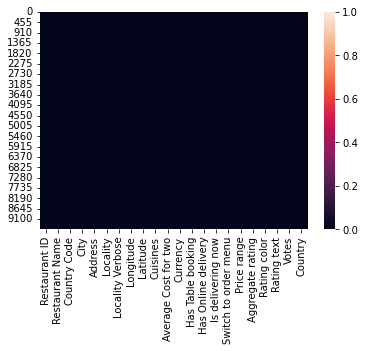

In [15]:
# visualising null values in dataset
sns.heatmap(data.isnull())

## Univariate Analysis

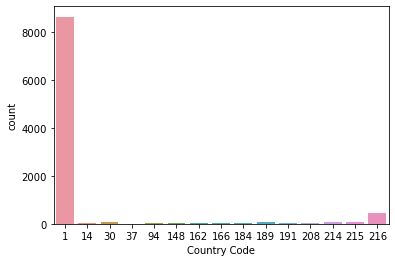

In [16]:
sns.countplot(x='Country Code',data=data)
plt.show()

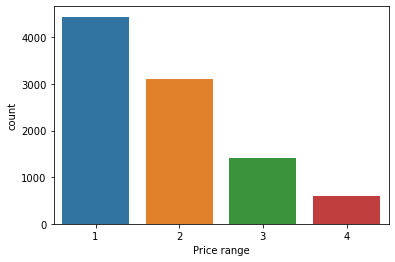

In [17]:
sns.countplot(x='Price range',data=data)
plt.show()

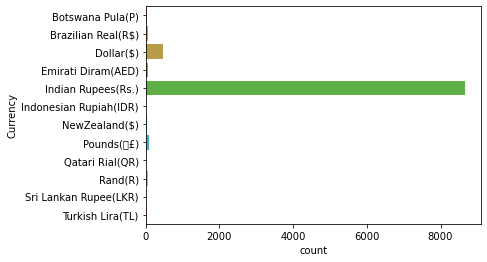

In [18]:
sns.countplot(y='Currency',data=data)
plt.show()

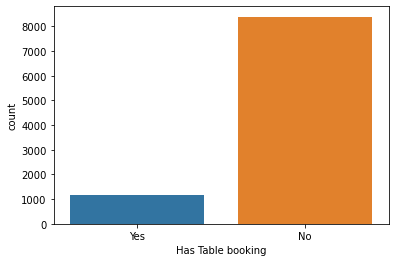

In [19]:
sns.countplot(x='Has Table booking',data=data)
plt.show()

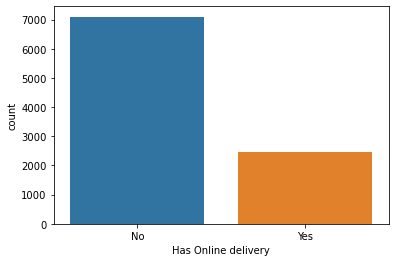

In [20]:
sns.countplot(x='Has Online delivery',data=data)
plt.show()

In [21]:
## Which countries do have online deliveries option
a=data[data['Has Online delivery']=='Yes'].Country.value_counts()

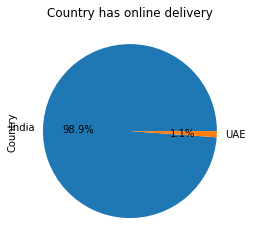

In [22]:
a.plot.pie(autopct = '%1.1f%%')
plt.title('Country has online delivery')
plt.show()

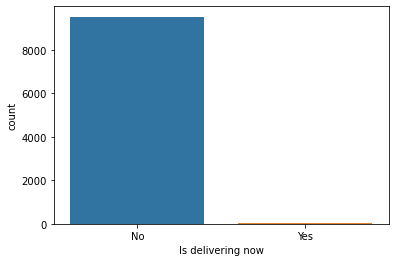

In [23]:
sns.countplot(x='Is delivering now',data=data)
plt.show()

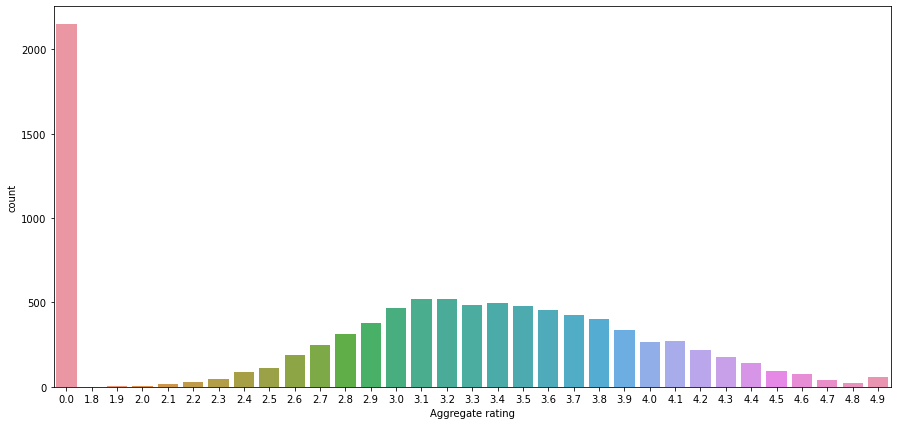

In [24]:
plt.figure(figsize=(15,7))
sns.countplot(x='Aggregate rating',data=data)
plt.show()

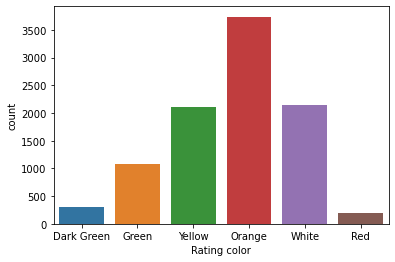

In [25]:
sns.countplot(x='Rating color',data=data,)
plt.show()

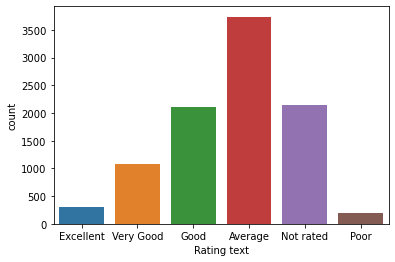

In [26]:
sns.countplot(x='Rating text',data=data,)
plt.show()

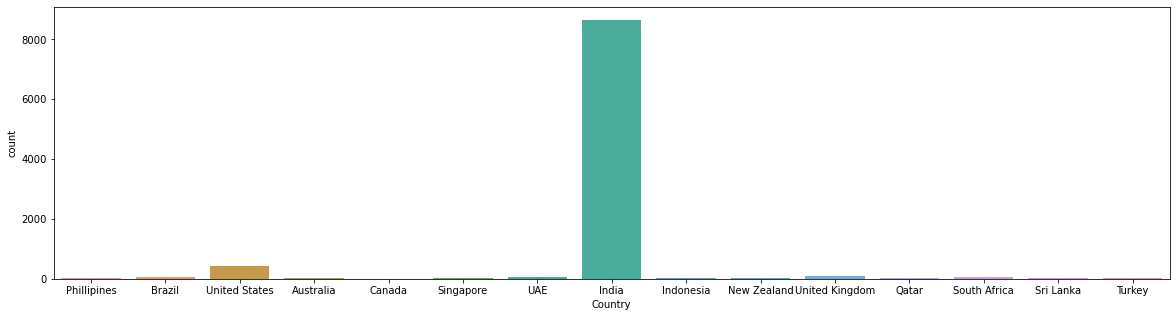

In [27]:
plt.figure(figsize=(20,5))
sns.countplot(x='Country',data=data)
plt.show()

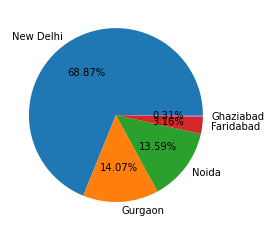

In [28]:
city_values = data.City.value_counts().values
city_labels = data.City.value_counts().index

plt.pie(city_values[:5],labels=city_labels[:5],autopct='%1.2f%%')
plt.show()

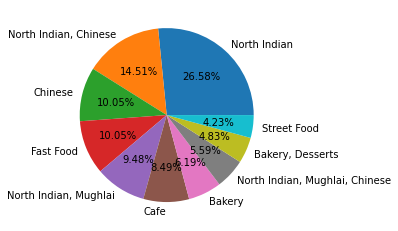

In [29]:
# Find top 10 Cuisine
cuisin_val=data.Cuisines.value_counts().values
cuisin_label = data.Cuisines.value_counts().index

plt.pie(cuisin_val[:10],labels=cuisin_label[:10],autopct='%1.2f%%')
plt.show()

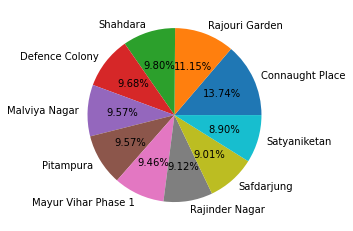

In [30]:
# Find top 10 location
val=data.Locality.value_counts().values
label = data.Locality.value_counts().index

plt.pie(val[:10],labels=label[:10],autopct='%1.2f%%')
plt.show()

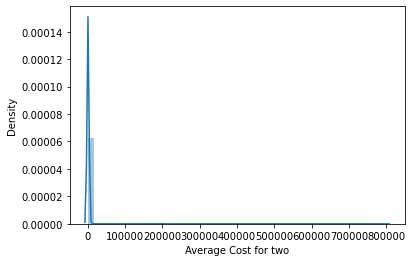

In [31]:
sns.distplot(data['Average Cost for two'])
plt.show()

## Bivariate Analysis

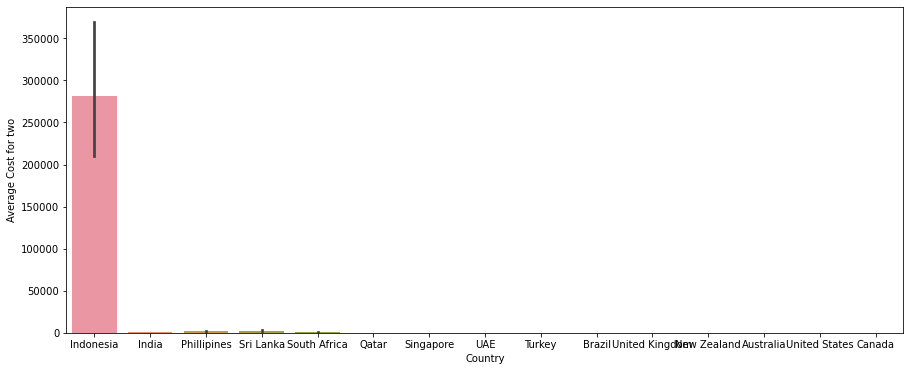

In [32]:
plt.figure(figsize=(15,6))
df_good = data.sort_values(by="Average Cost for two",ascending=False)
sns.barplot(x="Country",y="Average Cost for two",data=df_good)
plt.show()

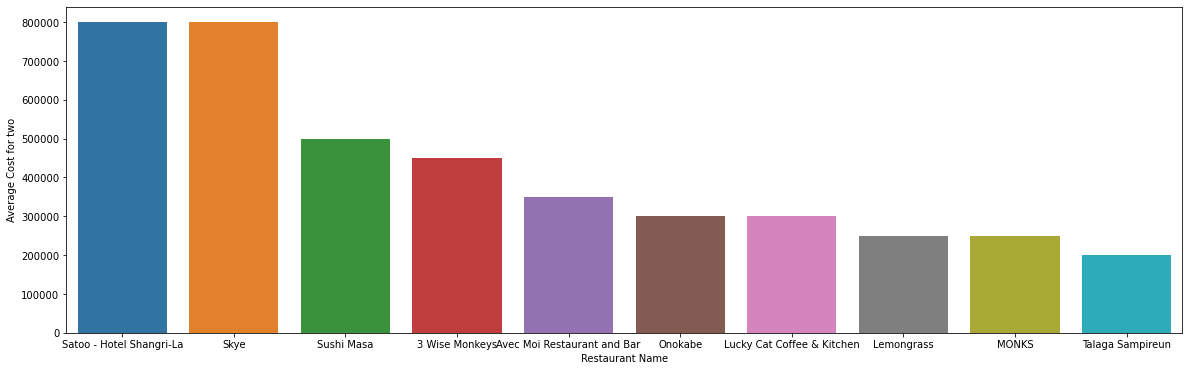

In [33]:
plt.figure(figsize=(20,6))
df_good = data.sort_values(by="Average Cost for two",ascending=False).iloc[0:10]
sns.barplot(x="Restaurant Name",y="Average Cost for two",data=df_good)
plt.show()

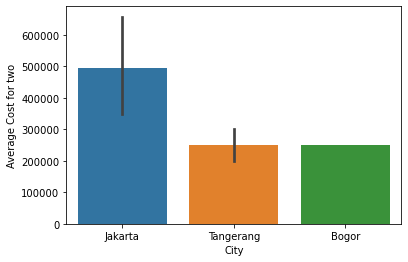

In [34]:
df_good = data.sort_values(by="Average Cost for two",ascending=False).iloc[0:10]
sns.barplot(x="City",y="Average Cost for two",data=df_good)
plt.show()

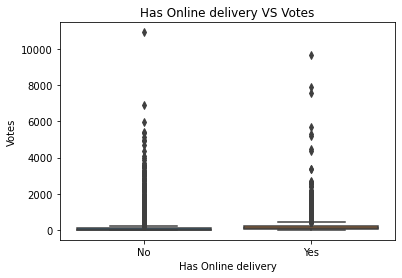

In [35]:
sns.boxplot(x='Has Online delivery',y='Votes',data=data)
plt.title('Has Online delivery VS Votes')
plt.show()

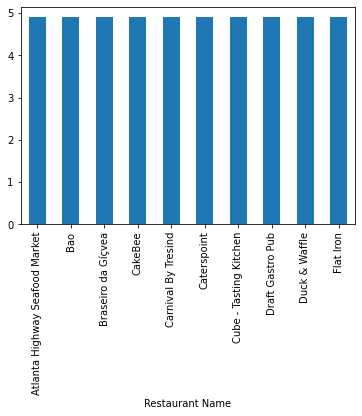

In [36]:
data.groupby('Restaurant Name')['Aggregate rating'].mean().nlargest(10).plot.bar()
plt.show()

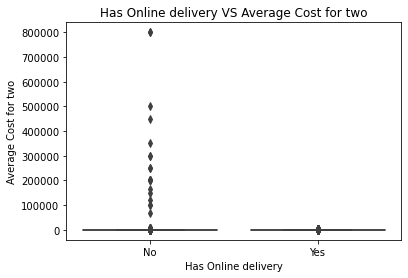

In [37]:
sns.boxplot(x='Has Online delivery',y='Average Cost for two',data=data)
plt.title('Has Online delivery VS Average Cost for two')
plt.show()

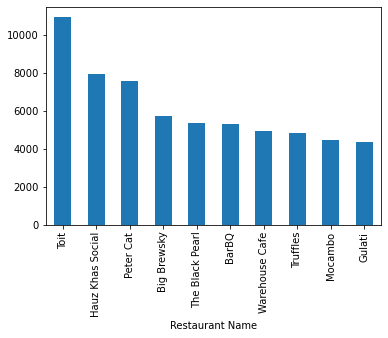

In [38]:
data.groupby('Restaurant Name')['Votes'].mean().nlargest(10).plot.bar()
plt.show()

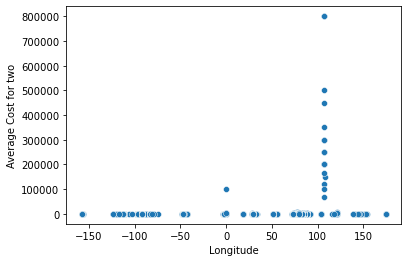

In [39]:
sns.scatterplot(y='Average Cost for two',x='Longitude',data=data)
plt.show()

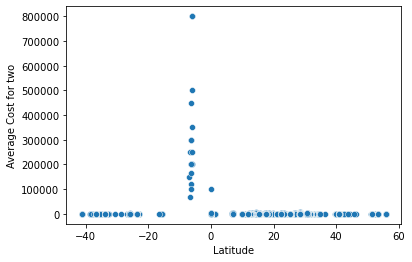

In [40]:
sns.scatterplot(y='Average Cost for two',x='Latitude',data=data)
plt.show()

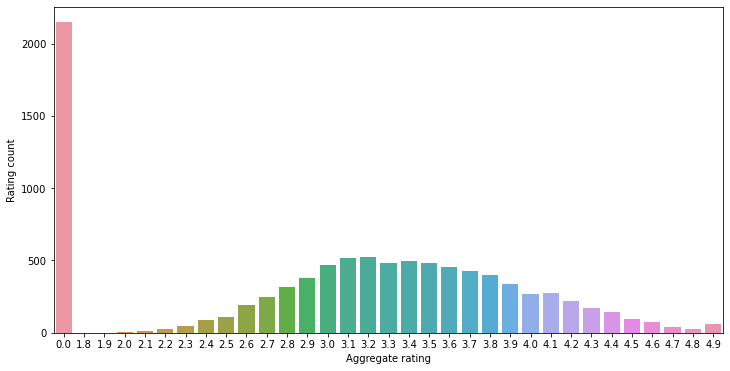

In [41]:
rating=data.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating count'})

plt.figure(figsize=(12,6))
sns.barplot(x='Aggregate rating',y='Rating count',data=rating)
plt.show()

* When rating is between 4.5 to 4.9-----> Excellent
* When rating is between 4.0 to 3.4-----> Very good
* When rating is between 3.5 to 3.9-----> Good
* When rating is between 2.5 to 2.9-----> Average
* When rating is between 2.0 to 2.4-----> Poor
* And 0 rating given by many people

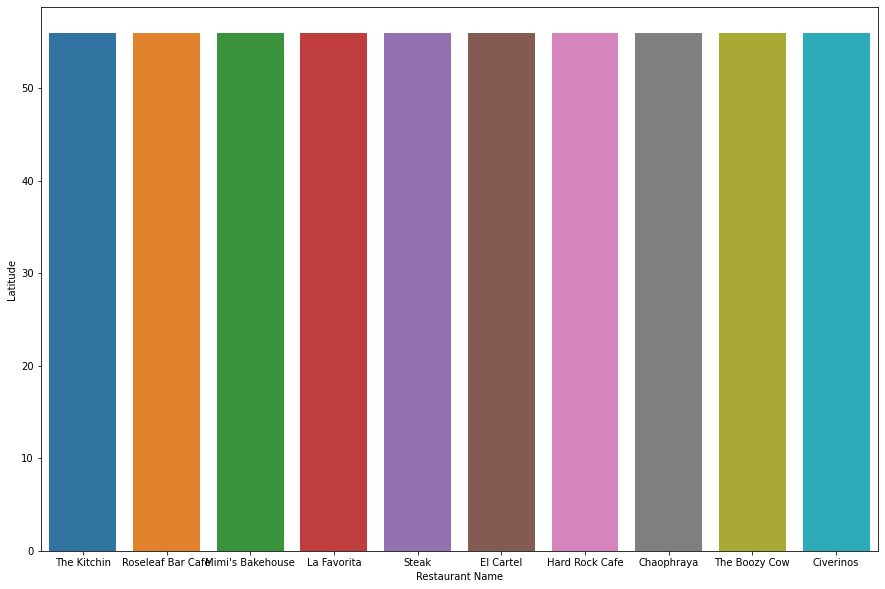

In [42]:
plt.figure(figsize=(15,10))
df_good = data.sort_values(by="Latitude",ascending=False).iloc[0:10,:]
sns.barplot(x="Restaurant Name",y="Latitude",data=df_good)
plt.show()

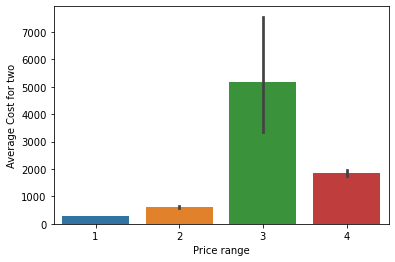

In [43]:
sns.barplot(x='Price range',y='Average Cost for two',data=data)
plt.show()

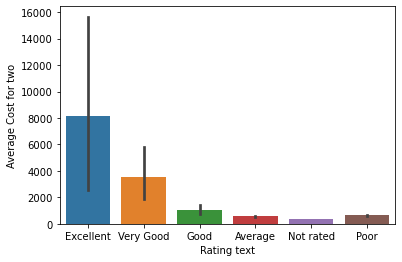

In [44]:
sns.barplot(x='Rating text',y='Average Cost for two',data=data)
plt.show()

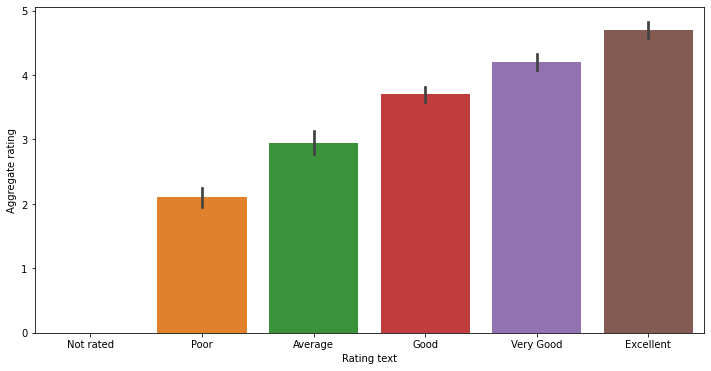

In [45]:
plt.figure(figsize=(12,6))
sns.barplot(y='Aggregate rating',x='Rating text',data=rating)
plt.show()

In [46]:
# Find the countrries name that has given 0 rating
data[data['Rating color']=='White'].groupby(['Aggregate rating','Country']).size().reset_index()

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3


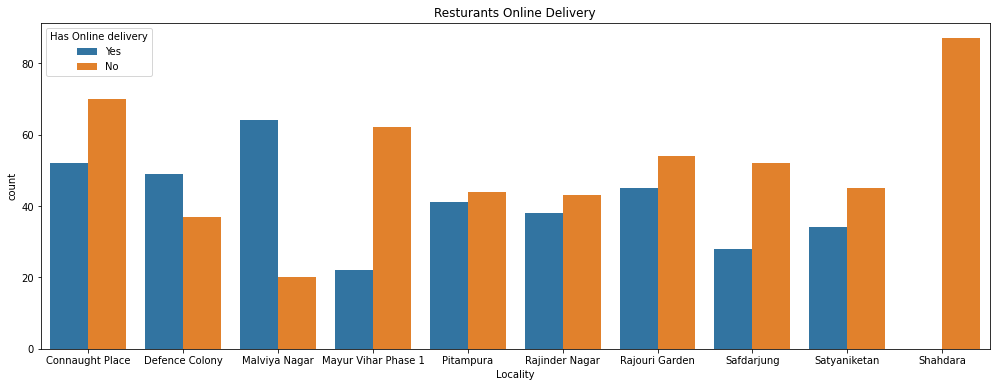

In [47]:
Delhi = data[(data.City == 'New Delhi')]
top_locality = Delhi.Locality.value_counts().head(10)
plt.figure(figsize=(17,6))
sns.countplot(x= "Locality", hue="Has Online delivery", data=Delhi[Delhi.Locality.isin(top_locality.index)])
plt.title('Resturants Online Delivery')
plt.show()

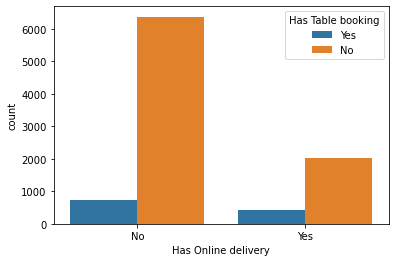

In [48]:
sns.countplot(x='Has Online delivery',hue='Has Table booking',data=data)
plt.show()

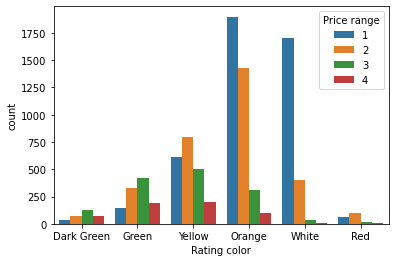

In [49]:
sns.countplot(x='Rating color',hue='Price range',data=data)
plt.show()

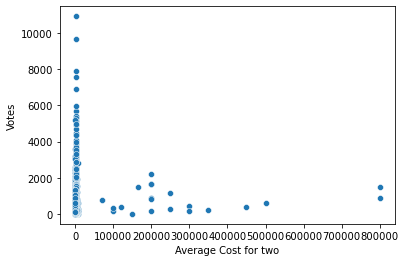

In [50]:
sns.scatterplot(y='Votes',x='Average Cost for two',data=data)
plt.show()

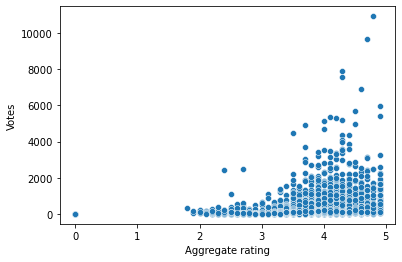

In [51]:
sns.scatterplot(y='Votes',x='Aggregate rating',data=data)
plt.show()

## Multivariate Analysis

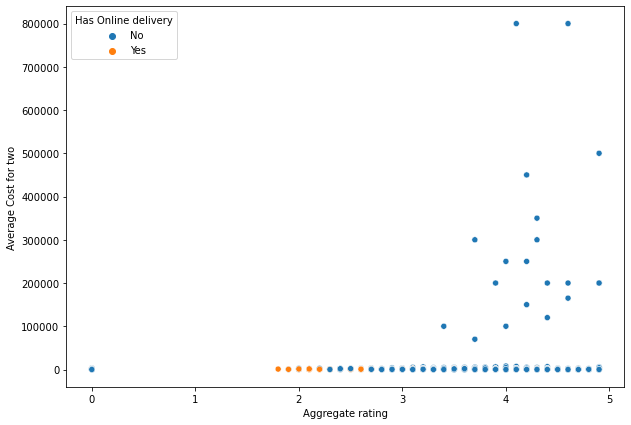

In [52]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Aggregate rating',y='Average Cost for two',hue='Has Online delivery',data=data)
plt.show()

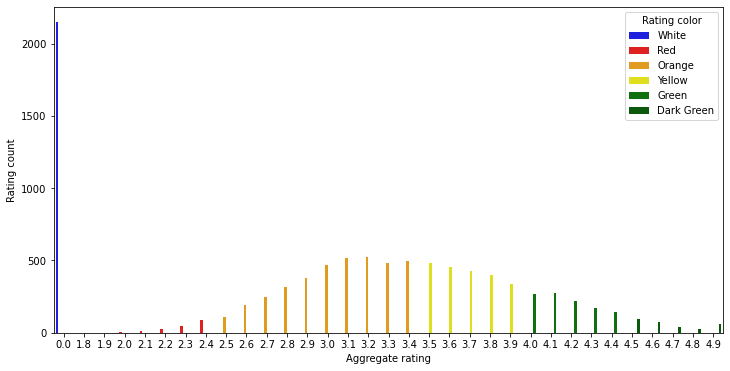

In [53]:
plt.figure(figsize=(12,6))
sns.barplot(x='Aggregate rating',y='Rating count',hue='Rating color',data=rating, palette=['blue','red','orange','yellow','green','darkgreen'])
plt.show()

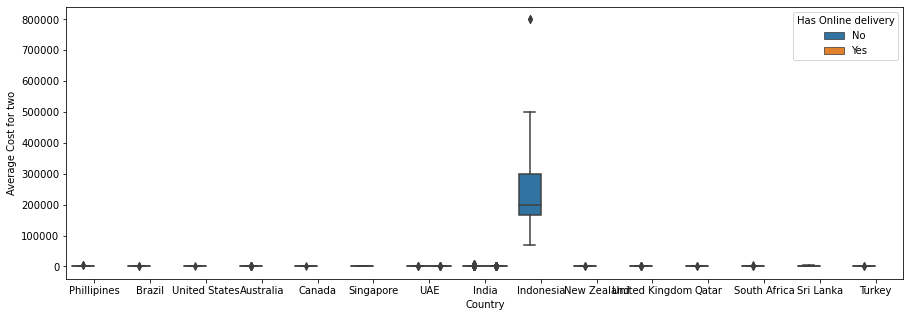

In [54]:
plt.figure(figsize=(15,5))
sns.boxplot(x="Country", y="Average Cost for two", hue="Has Online delivery",data=data)
plt.show()

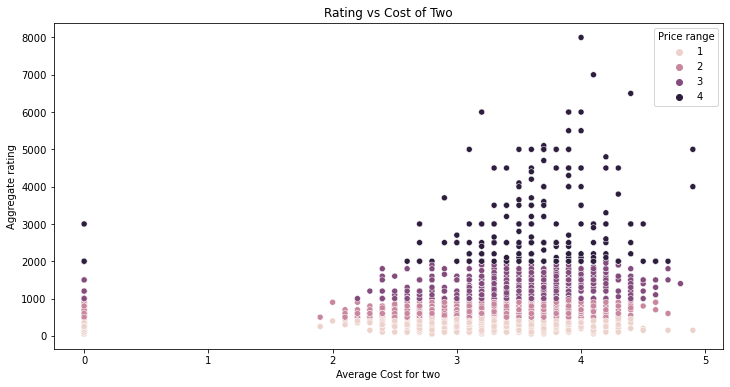

In [55]:
plt.figure(figsize=(12,6))
sns.scatterplot(y="Average Cost for two", x="Aggregate rating", hue='Price range', data=Delhi)

plt.xlabel("Average Cost for two")
plt.ylabel("Aggregate rating")
plt.title('Rating vs Cost of Two')
plt.show()

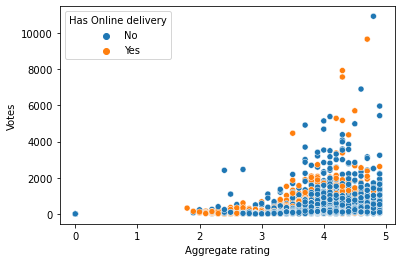

In [56]:
sns.scatterplot(y='Votes',x='Aggregate rating',data=data,hue='Has Online delivery')
plt.show()

## Encoding of DataFrame

In [57]:
data.drop(columns=['Restaurant ID','Locality Verbose'],axis=1,inplace=True)

In [58]:
le=LabelEncoder()

In [59]:
for col in data[data.columns[data.dtypes == 'object']]:
    data[col] = le.fit_transform(data[col])

In [60]:
data.head()

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,3749,162,73,8685,171,121.027535,14.565443,920,1100,0,1,0,0,0,3,4.8,0,1,314,6
1,3173,162,73,6055,593,121.014101,14.553708,1111,1200,0,1,0,0,0,3,4.5,0,1,591,6
2,2897,162,75,4684,308,121.056831,14.581404,1671,4000,0,1,0,0,0,4,4.4,1,5,270,6
3,4707,162,75,8690,862,121.056475,14.585318,1126,1500,0,0,0,0,0,4,4.9,0,1,365,6
4,5523,162,75,8689,862,121.057508,14.584450,1122,1500,0,1,0,0,0,4,4.8,0,1,229,6


## Describe the Dataset

In [61]:
data.describe()

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.00000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.0,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,3653.204586,18.365616,78.301434,4542.439430,658.128468,64.126574,25.854381,989.95079,1199.210763,3.977699,0.121244,0.256622,0.003560,0.0,1.804837,2.666370,2.952885,1.788713,156.909748,3.736781
std,2142.917876,56.750546,23.198915,2565.717005,315.866515,41.467058,11.007935,514.72354,16121.183073,0.914242,0.326428,0.436792,0.059561,0.0,0.905609,1.516378,1.493048,1.694637,430.169145,2.651963
min,0.000000,1.000000,0.000000,0.000000,0.000000,-157.948486,-41.330428,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1777.500000,1.000000,76.000000,2323.500000,381.000000,77.081343,28.478713,497.00000,250.000000,4.000000,0.000000,0.000000,0.000000,0.0,1.000000,2.500000,2.000000,0.000000,5.000000,3.000000
50%,3595.000000,1.000000,88.000000,4610.000000,696.000000,77.191964,28.570469,1127.00000,400.000000,4.000000,0.000000,0.000000,0.000000,0.0,2.000000,3.200000,2.000000,2.000000,31.000000,3.000000
75%,5485.500000,1.000000,88.000000,6746.500000,921.000000,77.282006,28.642758,1355.00000,700.000000,4.000000,0.000000,1.000000,0.000000,0.0,2.000000,3.700000,4.000000,3.000000,131.000000,3.000000
max,7445.000000,216.000000,140.000000,8917.000000,1207.000000,174.832089,55.976980,1825.00000,800000.000000,11.000000,1.000000,1.000000,1.000000,0.0,4.000000,4.900000,5.000000,5.000000,10934.000000,14.000000


## Correlation of the features with target column

In [62]:
data.corr()

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
Restaurant Name,1.000000,0.020012,-0.001399,0.000763,0.004322,-0.001920,0.009922,0.051496,0.019241,0.009669,0.041173,0.028082,0.011984,NaN,0.061275,0.029367,-0.007311,0.012131,0.018512,0.017560
Country Code,0.020012,1.000000,-0.181728,-0.220342,-0.120075,-0.698299,0.019792,-0.129451,0.043225,-0.033466,-0.061682,-0.154605,-0.018291,NaN,0.243327,0.282189,-0.187174,0.222685,0.154530,0.968700
City,-0.001399,-0.181728,1.000000,-0.019763,0.096444,0.117391,-0.004301,0.025764,-0.028838,-0.071996,-0.003762,0.012723,-0.014039,NaN,-0.105759,-0.132163,0.110887,-0.098985,-0.078406,-0.180959
Address,0.000763,-0.220342,-0.019763,1.000000,0.159555,0.185801,-0.038654,0.022833,0.022749,0.069499,0.006428,0.029874,0.031267,NaN,-0.034952,-0.151153,0.071264,-0.008029,-0.101754,-0.235815
Locality,0.004322,-0.120075,0.096444,0.159555,1.000000,0.086448,-0.020424,0.006499,-0.012136,0.023723,-0.065594,-0.030993,-0.007299,NaN,-0.114459,-0.174336,0.036831,-0.036969,-0.123569,-0.118784
Longitude,-0.001920,-0.698299,0.117391,0.185801,0.086448,1.000000,0.043207,0.122457,0.045891,0.337334,0.100488,0.178757,0.018787,NaN,-0.078939,-0.116818,0.059979,-0.181466,-0.085101,-0.766221
Latitude,0.009922,0.019792,-0.004301,-0.038654,-0.020424,0.043207,1.000000,0.038646,-0.111088,-0.101864,0.054658,0.118722,0.015001,NaN,-0.166688,0.000516,0.042590,-0.129447,-0.022962,0.181299
Cuisines,0.051496,-0.129451,0.025764,0.022833,0.006499,0.122457,0.038646,1.000000,0.005755,0.066783,0.050232,-0.017180,0.007708,NaN,-0.005489,-0.079494,-0.016180,-0.080025,-0.032362,-0.124141
Average Cost for two,0.019241,0.043225,-0.028838,0.022749,-0.012136,0.045891,-0.111088,0.005755,1.000000,0.045615,0.007758,-0.018974,-0.001862,NaN,0.075083,0.051792,-0.049970,0.031439,0.067783,-0.004034
Currency,0.009669,-0.033466,-0.071996,0.069499,0.023723,0.337334,-0.101864,0.066783,0.045615,1.000000,0.000640,0.006991,0.001458,NaN,0.075179,-0.006939,-0.040430,0.014598,-0.027111,-0.105296


In [63]:
data.corr()['Average Cost for two'].sort_values()

Latitude               -0.111088
Rating color           -0.049970
City                   -0.028838
Has Online delivery    -0.018974
Locality               -0.012136
Country                -0.004034
Is delivering now      -0.001862
Cuisines                0.005755
Has Table booking       0.007758
Restaurant Name         0.019241
Address                 0.022749
Rating text             0.031439
Country Code            0.043225
Currency                0.045615
Longitude               0.045891
Aggregate rating        0.051792
Votes                   0.067783
Price range             0.075083
Average Cost for two    1.000000
Switch to order menu         NaN
Name: Average Cost for two, dtype: float64

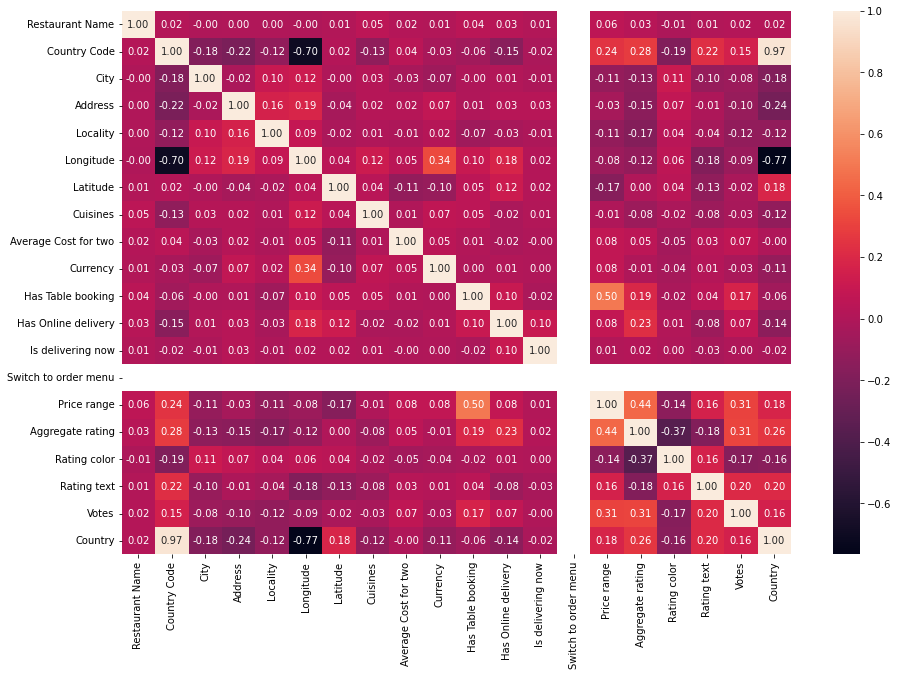

In [64]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, fmt ='.2f')
plt.show()

### Visualizing correlation of feature columns with label column

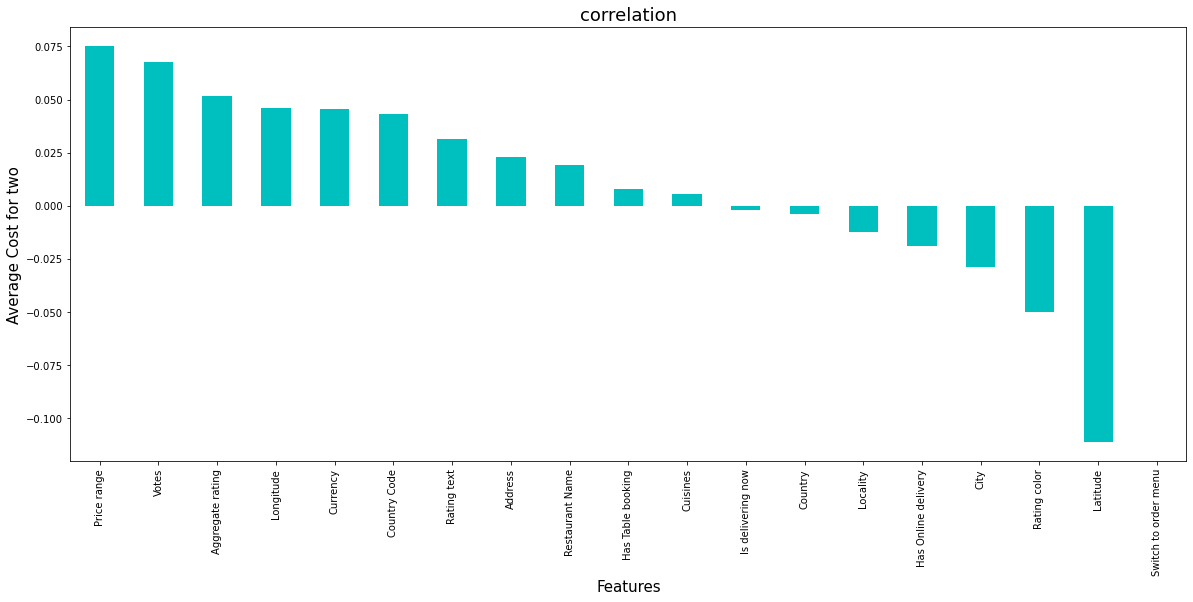

In [65]:
plt.figure(figsize = (20,8))
data.corr()['Average Cost for two'].sort_values(ascending = False).drop(['Average Cost for two']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Average Cost for two',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

## Checking Distribution of data

In [66]:
data.shape

(9551, 20)

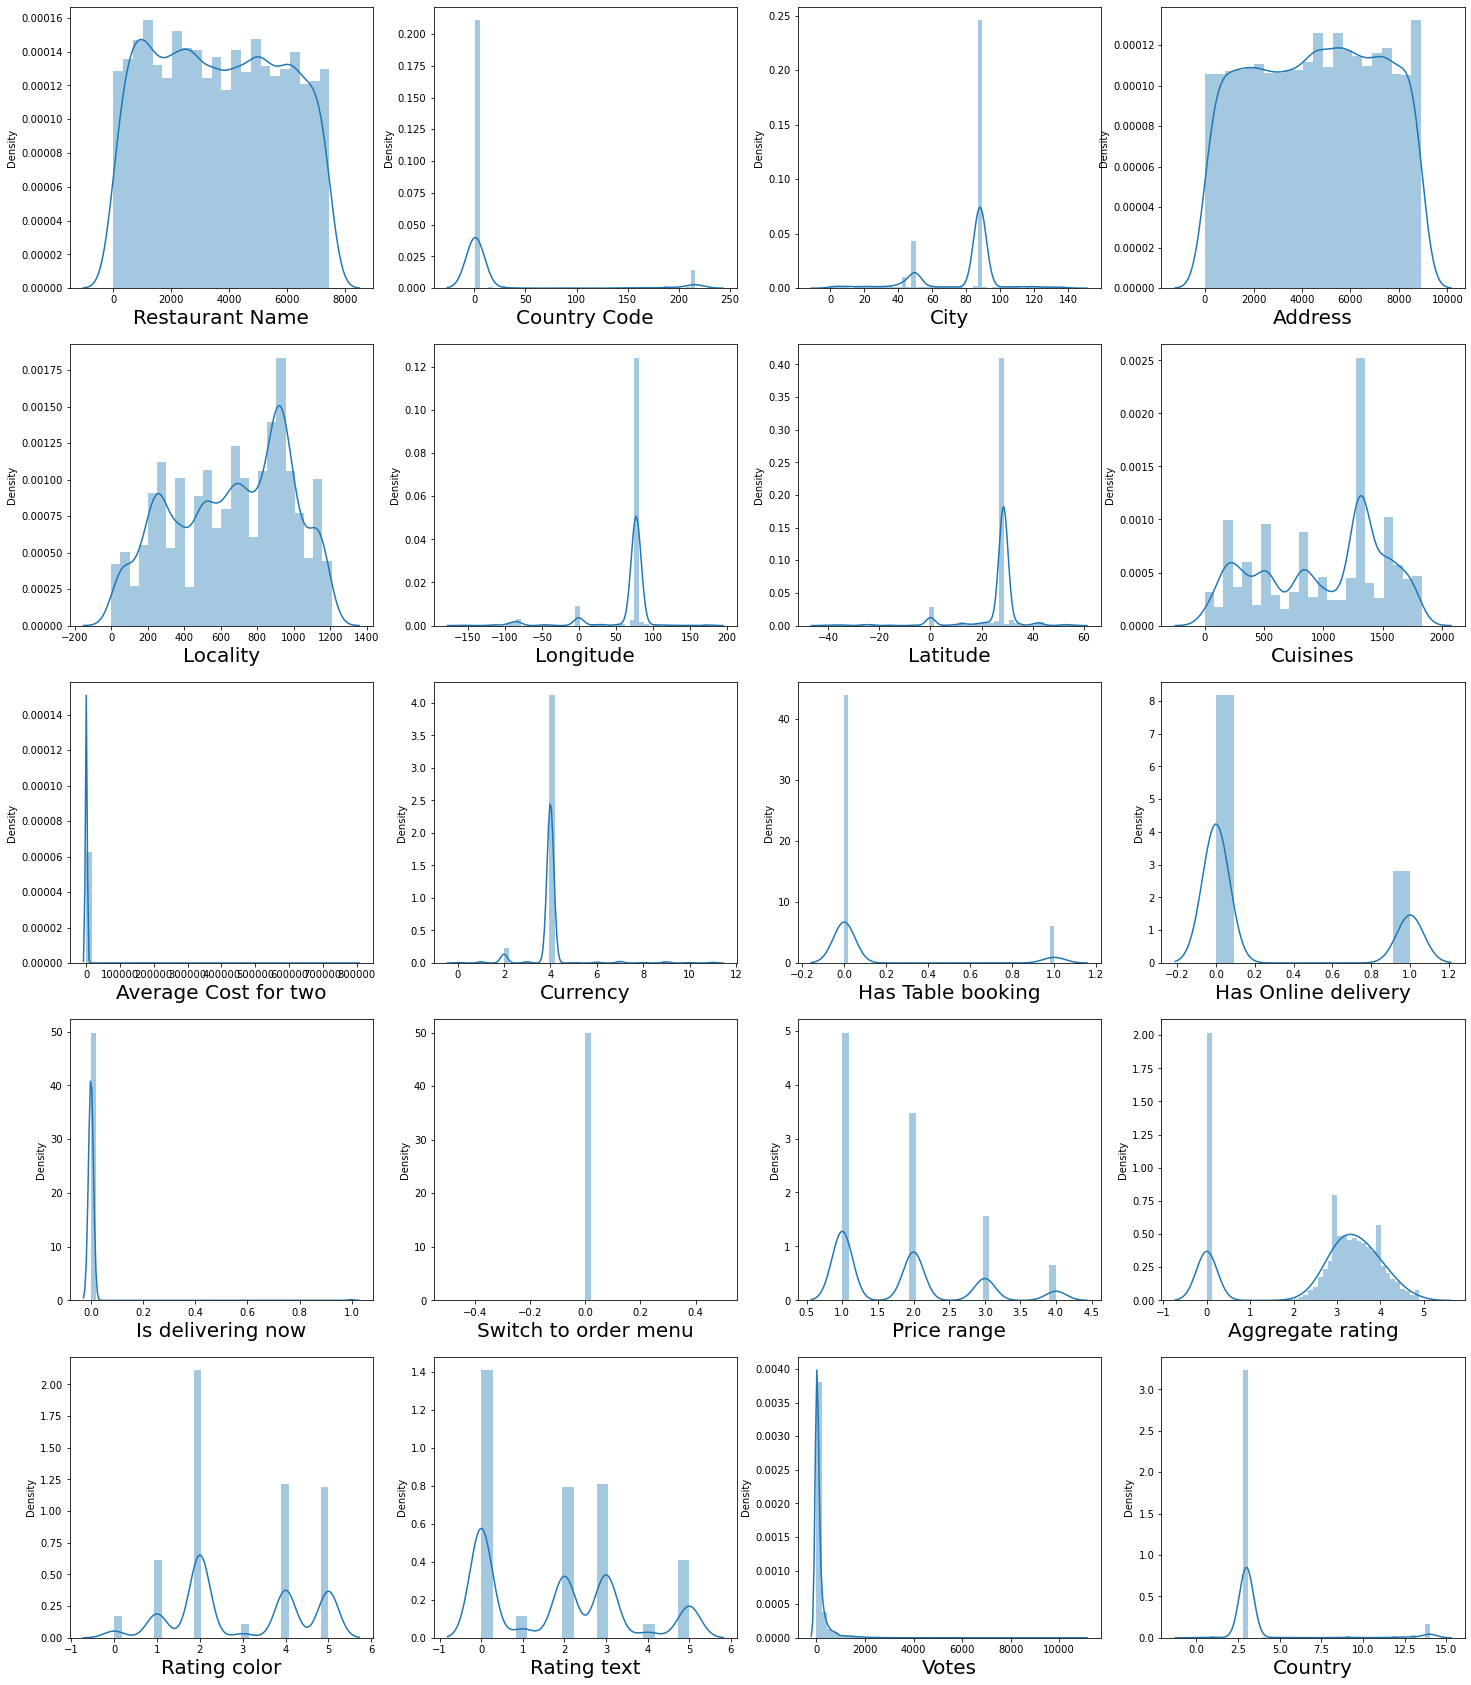

In [67]:
plt.figure(figsize=(25,30))
plotnumber = 1

for column in data:
    if plotnumber <=20:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

## Lets check skewness

In [68]:
data.skew()

Restaurant Name          0.044637
Country Code             3.043965
City                    -1.193777
Address                 -0.040407
Locality                -0.253554
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.305484
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Switch to order menu     0.000000
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
Country                  3.312721
dtype: float64

## Checking Outliers

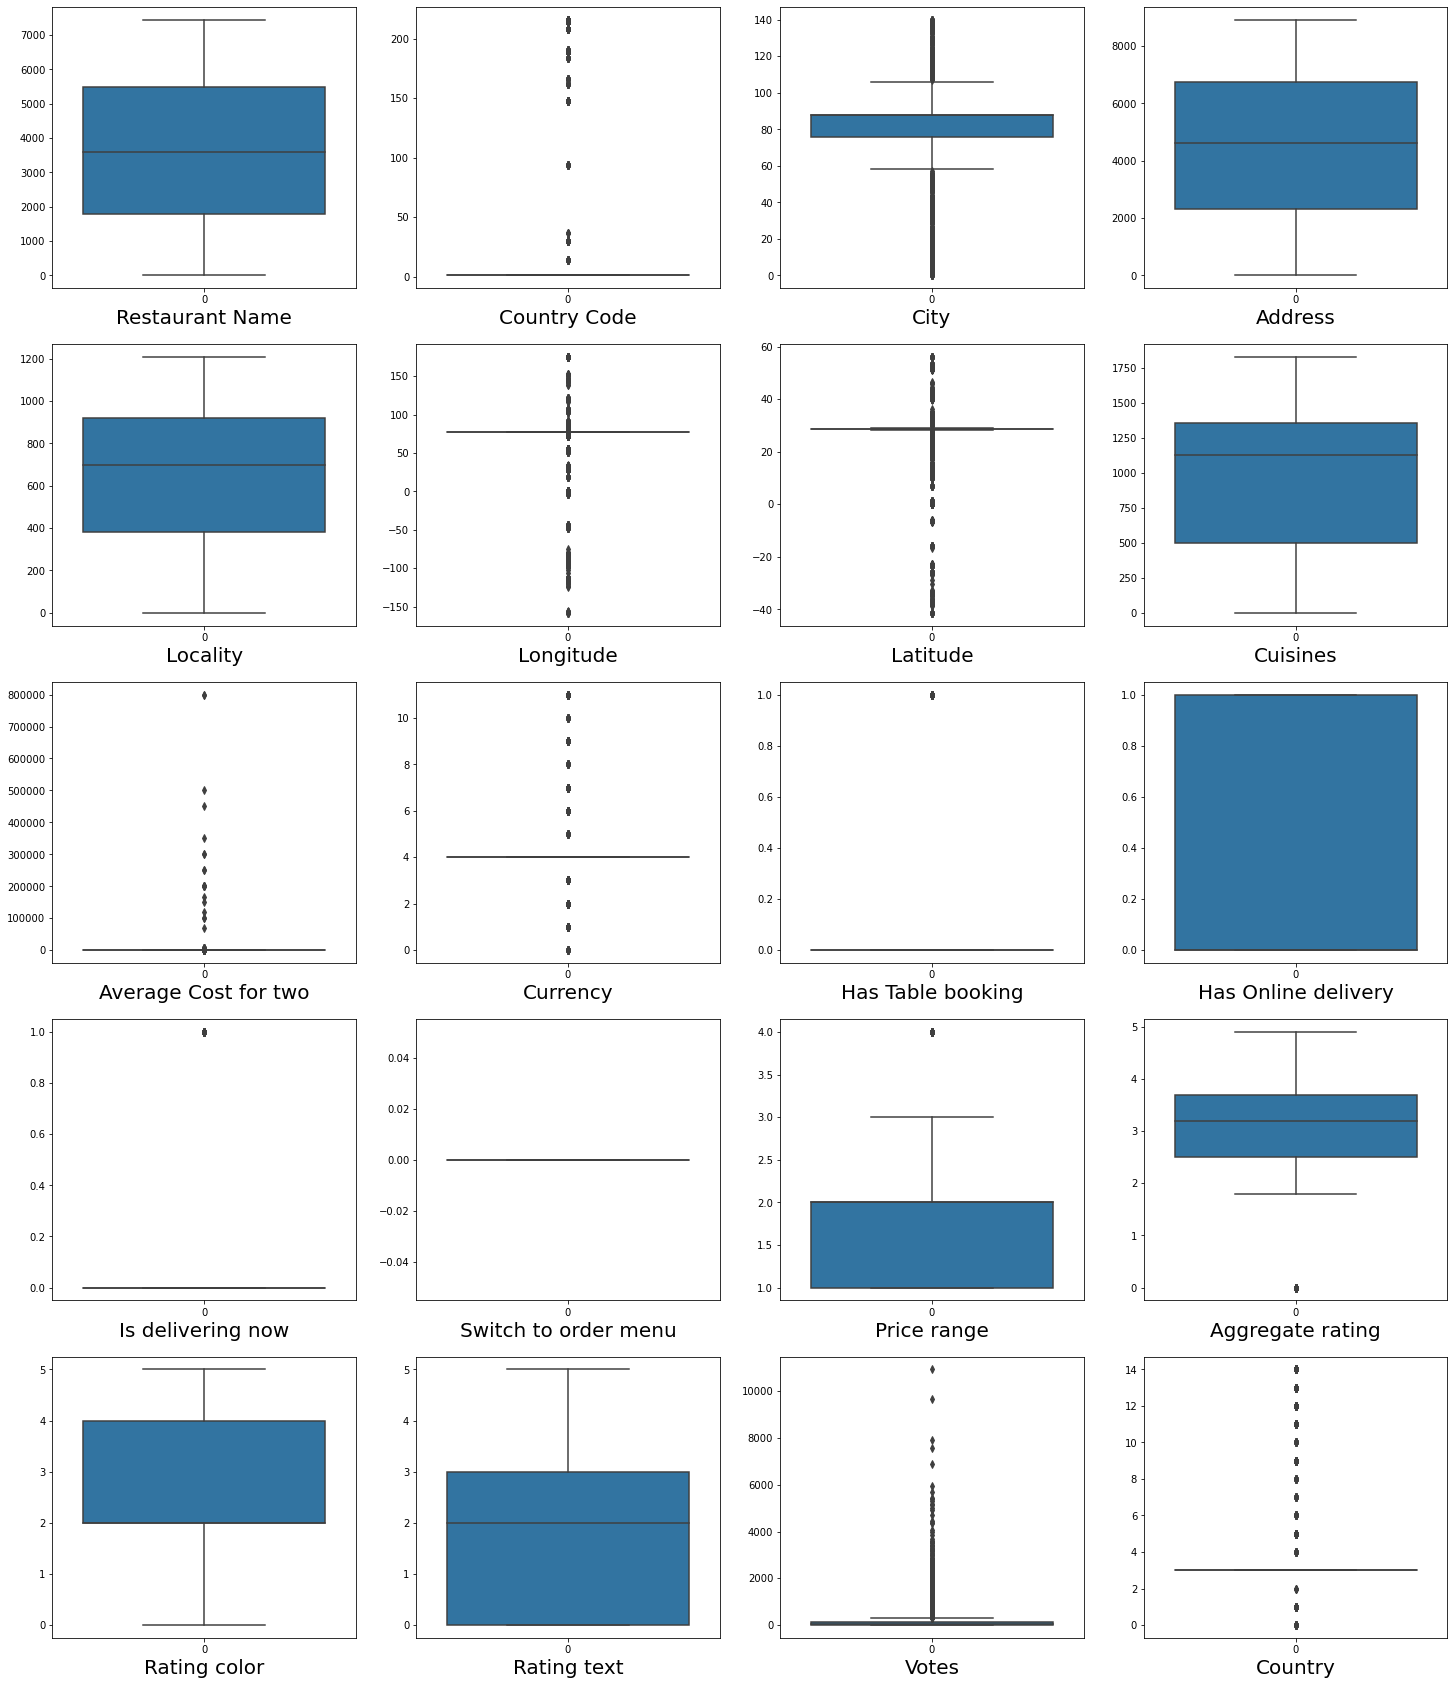

In [69]:
plt.figure(figsize=(25,30))
plotnumber = 1

for column in data:
    if plotnumber <=20:
        plt.subplot(5,4,plotnumber)
        ax = sns.boxplot(data=data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

## Removing Outliers

In [70]:
data.head()

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,3749,162,73,8685,171,121.027535,14.565443,920,1100,0,1,0,0,0,3,4.8,0,1,314,6
1,3173,162,73,6055,593,121.014101,14.553708,1111,1200,0,1,0,0,0,3,4.5,0,1,591,6
2,2897,162,75,4684,308,121.056831,14.581404,1671,4000,0,1,0,0,0,4,4.4,1,5,270,6
3,4707,162,75,8690,862,121.056475,14.585318,1126,1500,0,0,0,0,0,4,4.9,0,1,365,6
4,5523,162,75,8689,862,121.057508,14.584450,1122,1500,0,1,0,0,0,4,4.8,0,1,229,6


In [71]:
from scipy.stats import zscore

z_score = zscore(data[['Average Cost for two','Votes']]) # Only removing outliers from continuous data
abs_z_score = np.abs(z_score)    # Apply the formula and get the scaled data

filtering_entry = (abs_z_score  < 3).all(axis=1)

df_new = data[filtering_entry]

In [72]:
df_new.shape

(9362, 20)

In [73]:
data.shape

(9551, 20)

## Percentage of data loss

In [74]:
data_loss = ((9551 - 9362)/9551*100)
print(data_loss,'%')

1.978850382158936 %


## Checking Multicollinearity

In [75]:
x = df_new.drop(columns=['Average Cost for two'],axis=1)
y = df_new['Average Cost for two']

In [76]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(x)

In [77]:
vif = pd.DataFrame()

In [78]:
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,Restaurant Name,1.008700
1,Country Code,48.278786
2,City,1.081831
3,Address,1.106130
4,Locality,1.068078
5,Longitude,5.031289
6,Latitude,3.037873
7,Cuisines,1.043922
8,Currency,1.294013
9,Has Table booking,1.482431


### Droping columns whose having multicollinearity

In [79]:
df_new.drop(columns=['Country Code','Switch to order menu','Country'],axis=1,inplace=True)

In [80]:
df_new.shape

(9362, 17)

In [81]:
x = df_new.drop(columns=['Average Cost for two'],axis=1)
y = df_new['Average Cost for two']

In [82]:
from sklearn.feature_selection import SelectKBest, f_classif

In [83]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [84]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(35,'Score'))

                Feature       Score
11          Price range  418.202989
4             Longitude  142.353602
8     Has Table booking   80.635590
7              Currency   29.041295
15                Votes   25.818126
12     Aggregate rating   22.275744
5              Latitude   15.805349
9   Has Online delivery   11.752010
2               Address    7.795143
14          Rating text    7.144425
1                  City    4.863372
13         Rating color    4.044857
6              Cuisines    3.786064
3              Locality    3.379470
10    Is delivering now    2.063234
0       Restaurant Name    1.358221


## Selecting best features based on their scores

In [85]:
x_best = x.drop(columns=['Restaurant Name','Is delivering now']).copy()

## Data Skewness Before removing

In [86]:
data.skew()

Restaurant Name          0.044637
Country Code             3.043965
City                    -1.193777
Address                 -0.040407
Locality                -0.253554
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.305484
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Switch to order menu     0.000000
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
Country                  3.312721
dtype: float64

## Data After Removing Skewness

In [87]:
x = power_transform(x_best,method='yeo-johnson')

In [88]:
trans = pd.DataFrame(x)

In [89]:
trans.skew()

0    -0.198500
1    -0.302620
2    -0.306525
3    -0.795230
4    -0.259015
5    -0.382346
6     0.447069
7     2.382516
8     1.120081
9     0.197391
10   -0.615772
11   -0.100142
12   -0.055331
13   -0.021285
dtype: float64

In [90]:
x = scaler.fit_transform(x)

In [91]:
x

array([[-0.40644576,  1.47370479, -1.56895768, ..., -2.26885617,
        -0.20420612,  1.30223393],
       [-0.40644576,  0.61835876, -0.20264175, ..., -2.26885617,
        -0.20420612,  1.65627302],
       [-0.310708  ,  0.13463254, -1.11660629, ..., -1.38742706,
         1.51689551,  1.21890769],
       ...,
       [ 3.88657629,  0.58789144, -0.32621295, ...,  1.32393817,
         0.39794913,  1.71976831],
       [ 3.88657629,  0.58823442, -0.32621295, ..., -1.38742706,
         1.51689551,  1.8967675 ],
       [ 3.88657629, -0.0228778 ,  0.04024675, ..., -1.38742706,
         1.51689551,  1.65627302]])

## Model Building

## Linear Regression

### Finding Best Random State

In [92]:
from sklearn.linear_model import LinearRegression

# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 200):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.5808124988797441 on Random State 118


In [93]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=maxRS)

In [94]:
regressors = {
    'Linear Regression' : LinearRegression(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [95]:
results

,MAE,MSE,RMSE,R2-score
Linear Regression,211.021,134382.318,366.581939,0.581


## Cross - Validation of the model

In [96]:
y_pred = lr.predict(X_test)

lss  = r2_score(y_test,y_pred)

In [97]:
for j in range(4,10):
    isscore = cross_val_score(lr,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 4
Cross validation score is:- 24.207206131735205
accuracy_score is:- 58.26132763964033


At cv:- 5
Cross validation score is:- 4.250227605243189
accuracy_score is:- 58.26132763964033


At cv:- 6
Cross validation score is:- 8.4938666673487
accuracy_score is:- 58.26132763964033


At cv:- 7
Cross validation score is:- 3.1460712731030647
accuracy_score is:- 58.26132763964033


At cv:- 8
Cross validation score is:- -0.3584558191554871
accuracy_score is:- 58.26132763964033


At cv:- 9
Cross validation score is:- -5.626468433589564
accuracy_score is:- 58.26132763964033




In [98]:
lsscore_selected = cross_val_score(lr,x,y,cv=4).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.24207206131735207 
The accuracy score is:  0.5826132763964033


## RandomForest Regressor

### Finding Best Random State

In [99]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 200):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    rf=RandomForestRegressor()
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.8985249489390806 on Random State 94


In [100]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=maxRS)

In [101]:
regressors = {
    
    'Random Forest' : RandomForestRegressor(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [102]:
results

,MAE,MSE,RMSE,R2-score
Random Forest,104.445,36481.589,191.001542,0.9


## Cross - Validation of the model

In [103]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
lss  = r2_score(y_test,y_pred)

In [104]:
for j in range(4,10):
    isscore = cross_val_score(rf,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 4
Cross validation score is:- 60.64922406927727
accuracy_score is:- 89.96813395004766


At cv:- 5
Cross validation score is:- 43.61696592315097
accuracy_score is:- 89.96813395004766


At cv:- 6
Cross validation score is:- 48.004823370728005
accuracy_score is:- 89.96813395004766


At cv:- 7
Cross validation score is:- 44.03516153879233
accuracy_score is:- 89.96813395004766


At cv:- 8
Cross validation score is:- 41.26733704438161
accuracy_score is:- 89.96813395004766


At cv:- 9
Cross validation score is:- 39.20441868149086
accuracy_score is:- 89.96813395004766




In [105]:
lsscore_selected = cross_val_score(rf,x,y,cv=4).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.6027635372403046 
The accuracy score is:  0.8996813395004766


## Gradient Boosting Regressor

### Finding Best Random State

In [106]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 200):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    gbr = GradientBoostingRegressor()
    gbr.fit(X_train, y_train)
    pred = gbr.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.8840934800524812 on Random State 16


In [108]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=maxRS)

In [109]:
regressors = {
    
    'Gradient Boost Regressor' : GradientBoostingRegressor(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [110]:
results

,MAE,MSE,RMSE,R2-score
Gradient Boost Regressor,114.652,38750.042,196.850304,0.884


## Cross-validation of the model

In [111]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)
from sklearn.model_selection import cross_val_score
lss  = r2_score(y_test,y_pred)

In [112]:
for j in range(4,10):
    isscore = cross_val_score(gbr,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 4
Cross validation score is:- 69.10833522920295
accuracy_score is:- 88.37635091207972


At cv:- 5
Cross validation score is:- 58.05731099507723
accuracy_score is:- 88.37635091207972


At cv:- 6
Cross validation score is:- 56.98132286931521
accuracy_score is:- 88.37635091207972


At cv:- 7
Cross validation score is:- 55.63720711256694
accuracy_score is:- 88.37635091207972


At cv:- 8
Cross validation score is:- 55.67831955353332
accuracy_score is:- 88.37635091207972


At cv:- 9
Cross validation score is:- 53.083261825726225
accuracy_score is:- 88.37635091207972




In [113]:
lsscore_selected = cross_val_score(gbr,x,y,cv=4).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.6902237020171242 
The accuracy score is:  0.8837635091207972


## KNeighbors Regressor

### Finding Best Random State

In [114]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 200):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.7609839116527098 on Random State 118


In [115]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=maxRS)

In [116]:
regressors = {
    
    'KNN Regressor': KNeighborsRegressor()
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [117]:
results

,MAE,MSE,RMSE,R2-score
KNN Regressor,150.406,76623.315,276.809167,0.761


## Cross-validation of the model

In [118]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
lss  = r2_score(y_test,y_pred)

In [119]:
for j in range(4,10):
    isscore = cross_val_score(knn,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 4
Cross validation score is:- 43.652628614438804
accuracy_score is:- 76.09839116527098


At cv:- 5
Cross validation score is:- 32.48167330585002
accuracy_score is:- 76.09839116527098


At cv:- 6
Cross validation score is:- 37.19162355927823
accuracy_score is:- 76.09839116527098


At cv:- 7
Cross validation score is:- 35.05614718189994
accuracy_score is:- 76.09839116527098


At cv:- 8
Cross validation score is:- 29.169372538717752
accuracy_score is:- 76.09839116527098


At cv:- 9
Cross validation score is:- 27.879504598254535
accuracy_score is:- 76.09839116527098




In [120]:
lsscore_selected = cross_val_score(knn,x,y,cv=4).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.43652628614438804 
The accuracy score is:  0.7609839116527098


## Selecting The Best Model

## Hyperparameter tuning

In [121]:
from sklearn.model_selection import RandomizedSearchCV

In [122]:
param = {
             'min_samples_split':[2,5,10],
             'min_samples_leaf':[1,3,4],
             'max_depth':[5,10,15],
             'learning_rate': [0.1,0.2,0.3],
              'n_estimators':[150,200,250],
             }

In [ ]:
grd = GridSearchCV(gbr,param_grid = param)
grd.fit(X_train,y_train)

print('Best Params ',grd.best_params_)

In [ ]:
gbr = GradientBoostingRegressor(learning_rate=0.1, n_estimators=150, min_samples_split=10, min_samples_leaf=1, max_depth=15)

gbr.fit(X_train,y_train)

pred = gbr.predict(X_test)

r2_score(y_test,pred)

## Plot Actual VS Predicted Averahe Cost for two

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred)
plt.plot(y_test,y_test)
plt.xlabel('Actual Average Cost for two')
plt.ylabel('Predicted Average Cost for two')
plt.show()

## Model Save

In [ ]:
import pickle
pickle.dump(gbr, open('Zomato_Final','wb'))

## Predicting the Average Cost for two

In [ ]:
Prediction_accuracy = pd.DataFrame({'Predictions': gbr.predict(x), 'Actual Values': y})
Prediction_accuracy.head(30)

## Model Building For Predicting Price range (Classification)

In [ ]:
df.head()

## Checking Multicollinearity

In [ ]:
x = df.drop(columns=['Price range'],axis=1)
y = df['Price range']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_X = scaler.fit_transform(x)

In [ ]:
vif = pd.DataFrame()

In [ ]:
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
x = power_transform(x,method='yeo-johnson')

In [ ]:
# transform my dataset into standard normal distribution
sc = StandardScaler()
x = sc.fit_transform(x)
x

## Balancing the Data

In [ ]:
from imblearn.over_sampling import SMOTE as sm

smt_x,smt_y = sm().fit_resample(x,y)

In [ ]:
smt_y.value_counts()

## LogisticRegression

### Finding Best Random State

In [ ]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=maxRS)

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
accuracy_score(y_test,y_pred)

## Cross - validation for logistic Regression

In [ ]:
pred_lr = lr.predict(x_test)
accu = accuracy_score(y_test,pred_lr)

In [ ]:
for j in range(4,10):
    cross = cross_val_score(lr,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

In [ ]:
lsscore_selected = cross_val_score(lr,x,y,cv=4).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

In [ ]:
def metric_score(clf, x_train_ns,x_test,y_train_ns,y_test, train=True):
    if train:
        
        y_pred = clf.predict(x_train_ns)

        print("\n========================== Train Result=============================")

        print(f"Accuracy Score: {accuracy_score(y_train_ns, y_pred) * 100:.2f}%")

    
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n==========================Test Result=======================")
        print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
        
        print("\n \n Test Classification Report \n", classification_report(y_test, pred, digits=2))
        
        print('\n Confusion Matrix: \n',confusion_matrix(y_test,pred))

## Random Forest Classifier

### Finding Best Random State

In [ ]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=maxRS)

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

metric_score(rf,x_train,x_test,y_train, y_test, train=True)

metric_score(rf,x_train,x_test,y_train, y_test, train=False)

## Cross - Validation for Random Forest classifier

In [ ]:
pred_rf = rf.predict(x_test)
accu = accuracy_score(y_test,pred_rf)

In [ ]:
for j in range(4,10):
    cross = cross_val_score(rf,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

In [ ]:
lsscore_selected = cross_val_score(rf,x,y,cv=6).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

## Gradient Boosting Classifier

### Finding Best Random State

In [ ]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    gbc=GradientBoostingClassifier()
    gbc.fit(x_train, y_train)
    pred = gbc.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=maxRS)

In [ ]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

metric_score(gbc,x_train,x_test,y_train, y_test, train=True)

metric_score(gbc,x_train,x_test,y_train, y_test, train=False)

## Cross - validation For GradientBoosting Classifier

In [ ]:
pred_gbc = gbc.predict(x_test)
accu = accuracy_score(y_test,pred_gbc)

In [ ]:
for j in range(4,10):
    cross = cross_val_score(gbc,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

In [ ]:
lsscore_selected = cross_val_score(gbc,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

## SVC

### Finding Best Random State

In [ ]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    svc=SVC()
    svc.fit(x_train, y_train)
    pred = svc.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=maxRS)

In [ ]:
svc = SVC()
svc.fit(x_train,y_train)

metric_score(svc,x_train,x_test,y_train, y_test, train=True)

metric_score(svc,x_train,x_test,y_train, y_test, train=False)

## Cross - Validation for SVC

In [ ]:
pred_svc = svc.predict(x_test)
accu = accuracy_score(y_test,pred_svc)

In [ ]:
for j in range(4,10):
    cross = cross_val_score(svc,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

In [ ]:
lsscore_selected = cross_val_score(svc,x,y,cv=5).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

## KNN

### Finding Random State

In [ ]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    knn=KNeighborsClassifier()
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=maxRS)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

metric_score(knn,x_train,x_test,y_train, y_test, train=True)

metric_score(knn,x_train,x_test,y_train, y_test, train=False)

## Cross - Validation for KNN

In [ ]:
pred_knn = knn.predict(x_test)
accu = accuracy_score(y_test,pred_knn)

In [ ]:
for j in range(4,10):
    cross = cross_val_score(knn,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

In [ ]:
lsscore_selected = cross_val_score(knn,x,y,cv=8).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

## Selecting Best Model

## Hyperparameter Tuning

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=maxRS)

In [ ]:
param = {
    'max_depth': range(4,8),
    'min_samples_split': range(2,8,2),
    'learning_rate': np.arange(0.1,0.3),
    'n_estimators':[150,200,250],
    'min_samples_leaf':[2,3,4,5]
}

In [ ]:
gbc=GradientBoostingClassifier()

In [ ]:
rt = RandomizedSearchCV(gbc,param_distributions = param)

rt.fit(x_train,y_train)
rt.best_params_

In [ ]:
gbc=GradientBoostingClassifier(max_depth=6 , min_samples_split=4, min_samples_leaf=5, learning_rate=0.1, n_estimators=200)
gbc.fit(x_train,y_train)

metric_score(gbc,x_train,x_test,y_train, y_test, train=True)

metric_score(gbc,x_train,x_test,y_train, y_test, train=False)

## ROC_AUC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
#predicting the data
y_pred_cnb = gbc.predict(x_test)
y_prob_pred_cnb = gbc.predict_proba(x_test)

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_cnb[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--', label='Class 1 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--', label='Class 2 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--', label='Class 3 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--', label='Class 4 vs Rest')


plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

## Model Save

In [ ]:
import pickle
pickle.dump(gbc, open('Insurance_claims_Final','wb'))

## Predicting the Price range

In [ ]:
print(gbc.predict(x))

In [ ]:
Prediction_accuracy = pd.DataFrame({'Predictions': gbc.predict(x), 'Actual Values': y})
Prediction_accuracy.head(10)